In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

Life Expectancy: Project examines changes in life exectancy over the data timeframe and reviews certain contributing factors.


In [ ]:
life_expectancy_path = "life_expectancy.csv"

life_expectancy_data = pd.read_csv(life_expectancy_path)

life_expectancy_data

In [4]:
life_exp_df = life_expectancy_data.copy()

type(life_exp_df)

pandas.core.frame.DataFrame

In [5]:
life_exp_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:

reduced_df = life_exp_df[['Country', 'Year', 'Status', 'Life expectancy ',
       'Alcohol', ' BMI ', 'Total expenditure','GDP', 'Population',
       'Income composition of resources', 'Schooling']]

reduced_df.columns = [col.strip() for col in reduced_df.columns]

reduced_df

In [ ]:
pd.set_option('display.max_rows', None)
reduced_df['Country'].value_counts()

In [ ]:
drop_countries = ['San Marino', 'Marshall Islands', 'Cook Islands', 'Saint Kitts and Nevis', 'Niue', 'Palau', 'Dominica', 'Monaco', 'Nauru',
                  'Tuvalu']

for country in drop_countries:
    reduced_df.drop(reduced_df[reduced_df['Country'] == country].index, inplace=True)
    
reduced_df['Country'].value_counts()  

In [ ]:
reduced_df.groupby("Country").count() 

In [ ]:
#Create dataframe to focus on life expectancy data
status_df = reduced_df.groupby(['Year', 'Status'], as_index=False)['Life expectancy'].mean()

year_df = pd.DataFrame(status_df)

year_df

In [17]:
#Create pivot to plot life expectancy change over the data timeframe
years_df = year_df.pivot_table(index=['Year'], columns=['Status'], values = 'Life expectancy')

years_final_df = pd.DataFrame(years_df)

years_final_df

Status,Developed,Developing
Year,,
2000,76.803125,64.619868
2001,77.128125,65.009934
2002,77.546875,65.190728
2003,77.940625,65.206623
2004,78.384375,65.370861
2005,78.590625,66.009272
2006,79.131250,66.450331
2007,79.300000,66.860927
2008,78.931250,67.413907


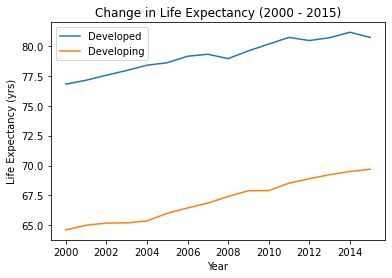

In [12]:
#Create line chart to display life expectancy trend over data years 
plt.plot(years_final_df)
plt.title("Change in Life Expectancy (2000 - 2015)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (yrs)")
plt.legend(['Developed', 'Developing'], loc="best")

plt.savefig("Life Expectancy Trend.png")

plt.show()

In [ ]:
#create dataframe for percent change in life expectancy from year to year
pct_change = years_final_df.pct_change()

pct_change['Developed'] = pct_change['Developed'].fillna(0)
pct_change['Developing'] = pct_change['Developing'].fillna(0)
pct_change['Developed'] = pct_change['Developed'].astype(float) * 100
pct_change['Developing'] = pct_change['Developing'].astype(float) * 100
           
pct_change

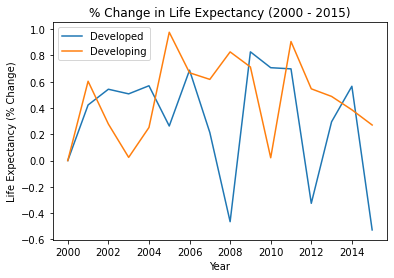

In [14]:
#Create line chart for life expectancy yearly percent change
plt.plot(pct_change)
plt.title("% Change in Life Expectancy (2000 - 2015)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (% Change)")
plt.legend(['Developed', 'Developing'], loc="best")

plt.savefig("Life Expectancy % Change.png")

plt.show()

Observations: Life Expectancy Trends for Developing and Developed countires (2000 - 2015)

1. As expected, Life Expectancy has increased over the period by roughly 3 years for Developed countries and 5 years for Developing countries. 
2. Although Developed countries have a higher Life Expectancy, Developing countries show a greater increase over the period at 7.8% compared to 5% for Developed countries.
3. There is variation in Life Expectancy with 2008 and 2015 showing decreases in Life Expectancy. Further analysis needs to be done to determine what contributing factors led to the decreases for those 2 years.